# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

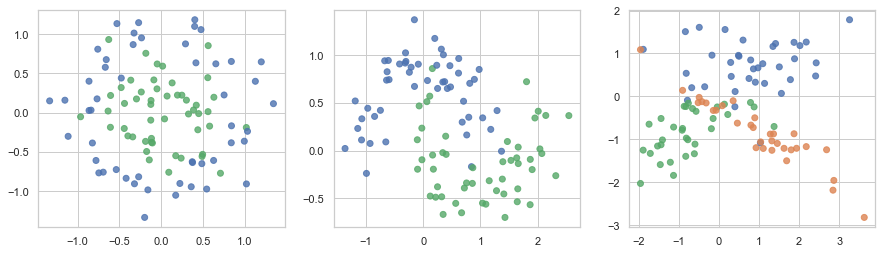

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

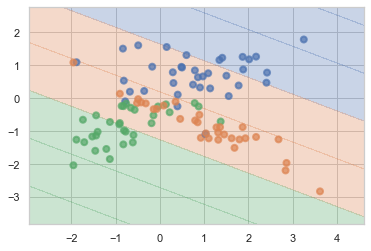

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train accuracy = 1.00
Test accuracy = 0.73


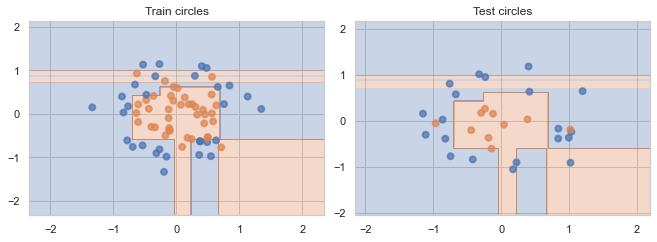

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_cir, y_cir = datasets[0]
X_train_cir, X_test_cir, y_train_cir, y_test_cir = train_test_split(X_cir, y_cir, test_size=0.3, random_state=42)
model_1  = DecisionTreeClassifier().fit(X_train_cir, y_train_cir)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_surface(model_1, X_train_cir, y_train_cir)
plt.title('Train circles')
plt.subplot(1, 2, 2)
plot_surface(model_1, X_test_cir, y_test_cir)
plt.title('Test circles')

print("Train accuracy = %.2f" % accuracy_score(y_train_cir, model_1.predict(X_train_cir)))
print("Test accuracy = %.2f" % accuracy_score(y_test_cir, model_1.predict(X_test_cir)))

Train accuracy = 1.00
Test accuracy = 0.87


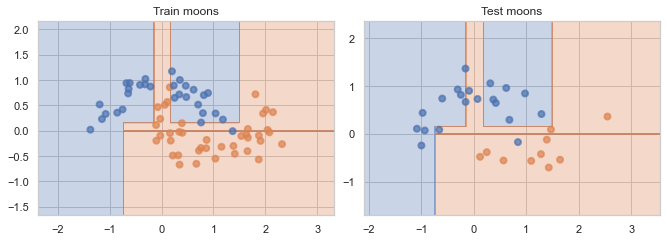

In [196]:
X_moon, y_moon = datasets[1]
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)
model_2  = DecisionTreeClassifier().fit(X_train_moon, y_train_moon)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_surface(model_2, X_train_moon, y_train_moon)
plt.title('Train moons')
plt.subplot(1, 2, 2)
plot_surface(model_2, X_test_moon, y_test_moon)
plt.title('Test moons')

print("Train accuracy = %.2f" % accuracy_score(y_train_moon, model_2.predict(X_train_moon)))
print("Test accuracy = %.2f" % accuracy_score(y_test_moon, model_2.predict(X_test_moon)))

Train accuracy = 1.00
Test accuracy = 0.80


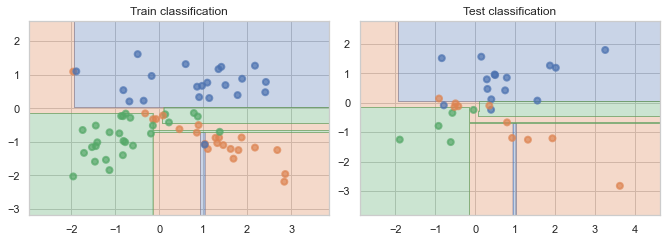

In [197]:
X_clasf, y_clasf = datasets[2]
X_train_clasf, X_test_clasf, y_train_clasf, y_test_clasf = train_test_split(X_clasf, y_clasf, test_size=0.3, random_state=42)
model_3  = DecisionTreeClassifier().fit(X_train_clasf, y_train_clasf)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_surface(model_3, X_train_clasf, y_train_clasf)
plt.title('Train classification')
plt.subplot(1, 2, 2)
plot_surface(model_3, X_test_clasf, y_test_clasf)
plt.title('Test classification')

print("Train accuracy = %.2f" % accuracy_score(y_train_clasf, model_3.predict(X_train_clasf)))
print("Test accuracy = %.2f" % accuracy_score(y_test_clasf, model_3.predict(X_test_clasf)))

__Ответ:__ да, для датасетов circles и classification деревья достаточно сильно переобучаются (но стоит так же принять во внимание тот факт, что выборка не такая уж и большая). Например для circles выделилась дополнительная область (ораньжевая, в нижнем правом улгу) хоть в неё и попала лишь одна точка на обуччающей выборке. Для classification так же заментно переобучение (синий прямоугольник внизу по центру и ораньжевый прямоугольник в верхнем левом углу)

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem07-trees.ipynb

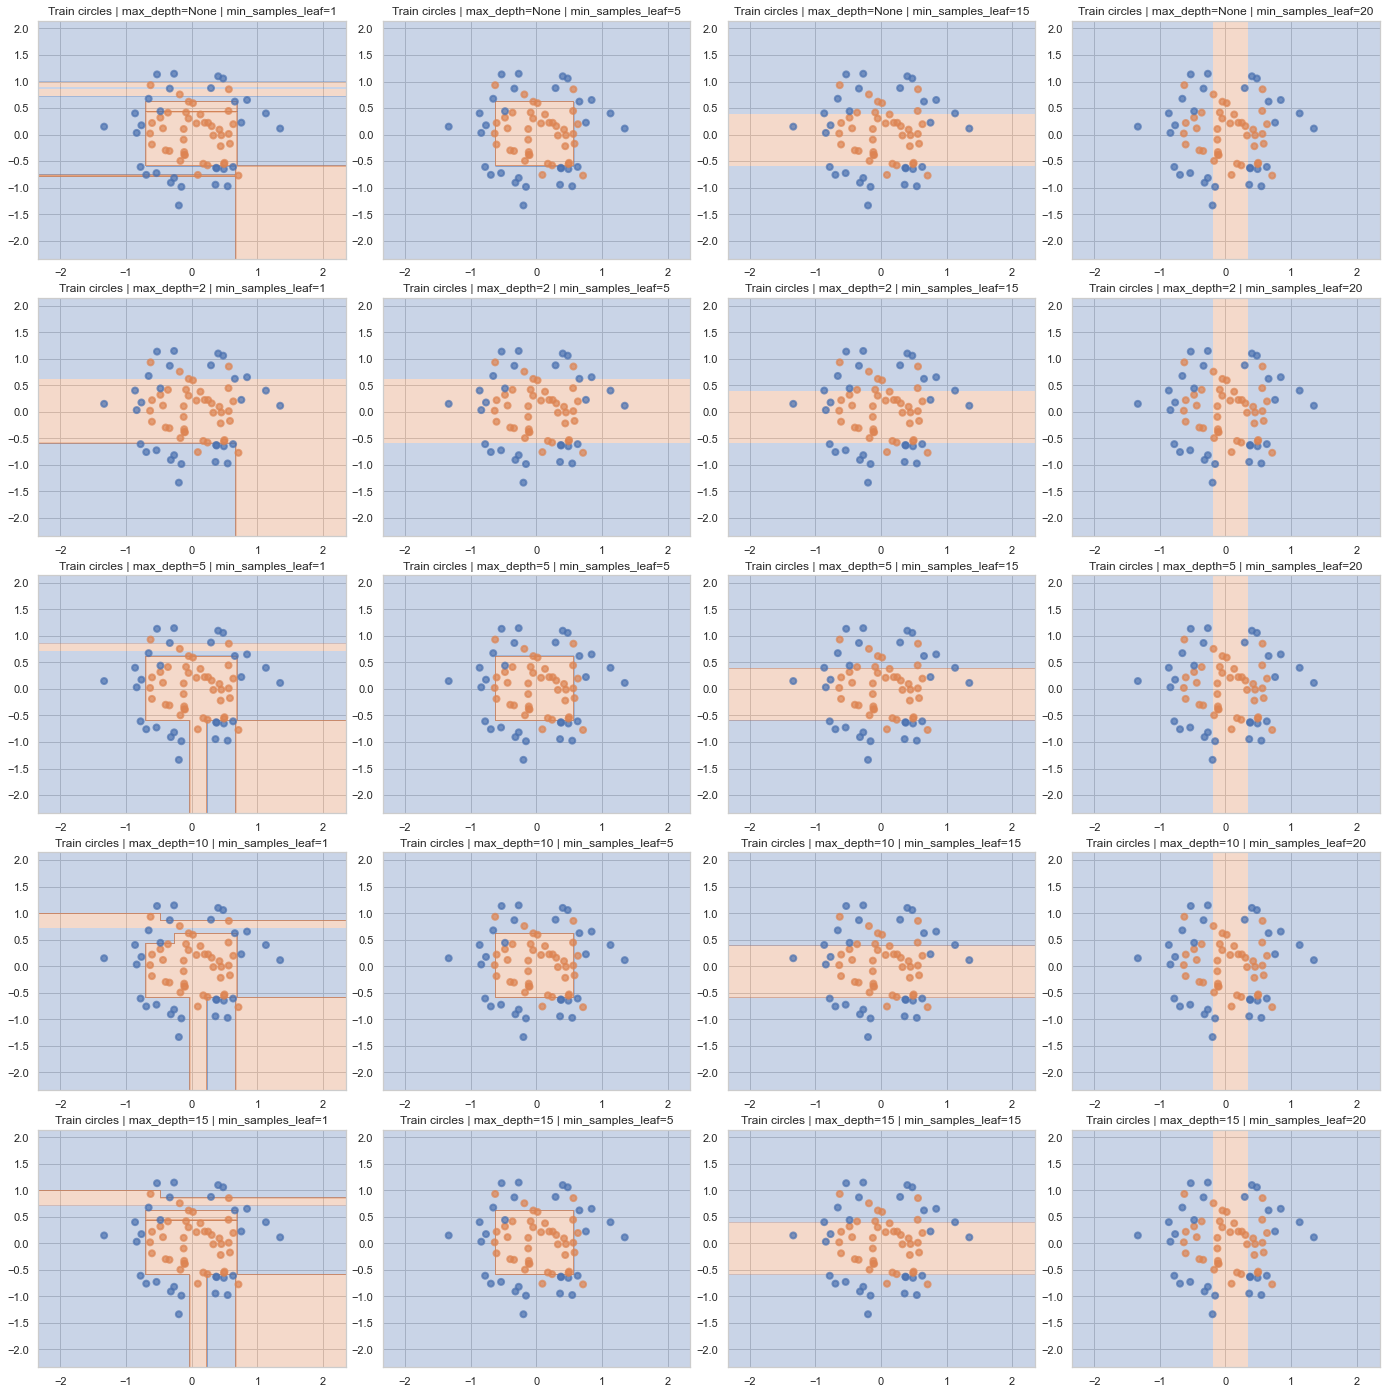

In [198]:
plt.figure(figsize=(20, 20))
for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_cir, y_train_cir)
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(model, X_train_cir, y_train_cir)
        plt.title('Train circles | ' + 'max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

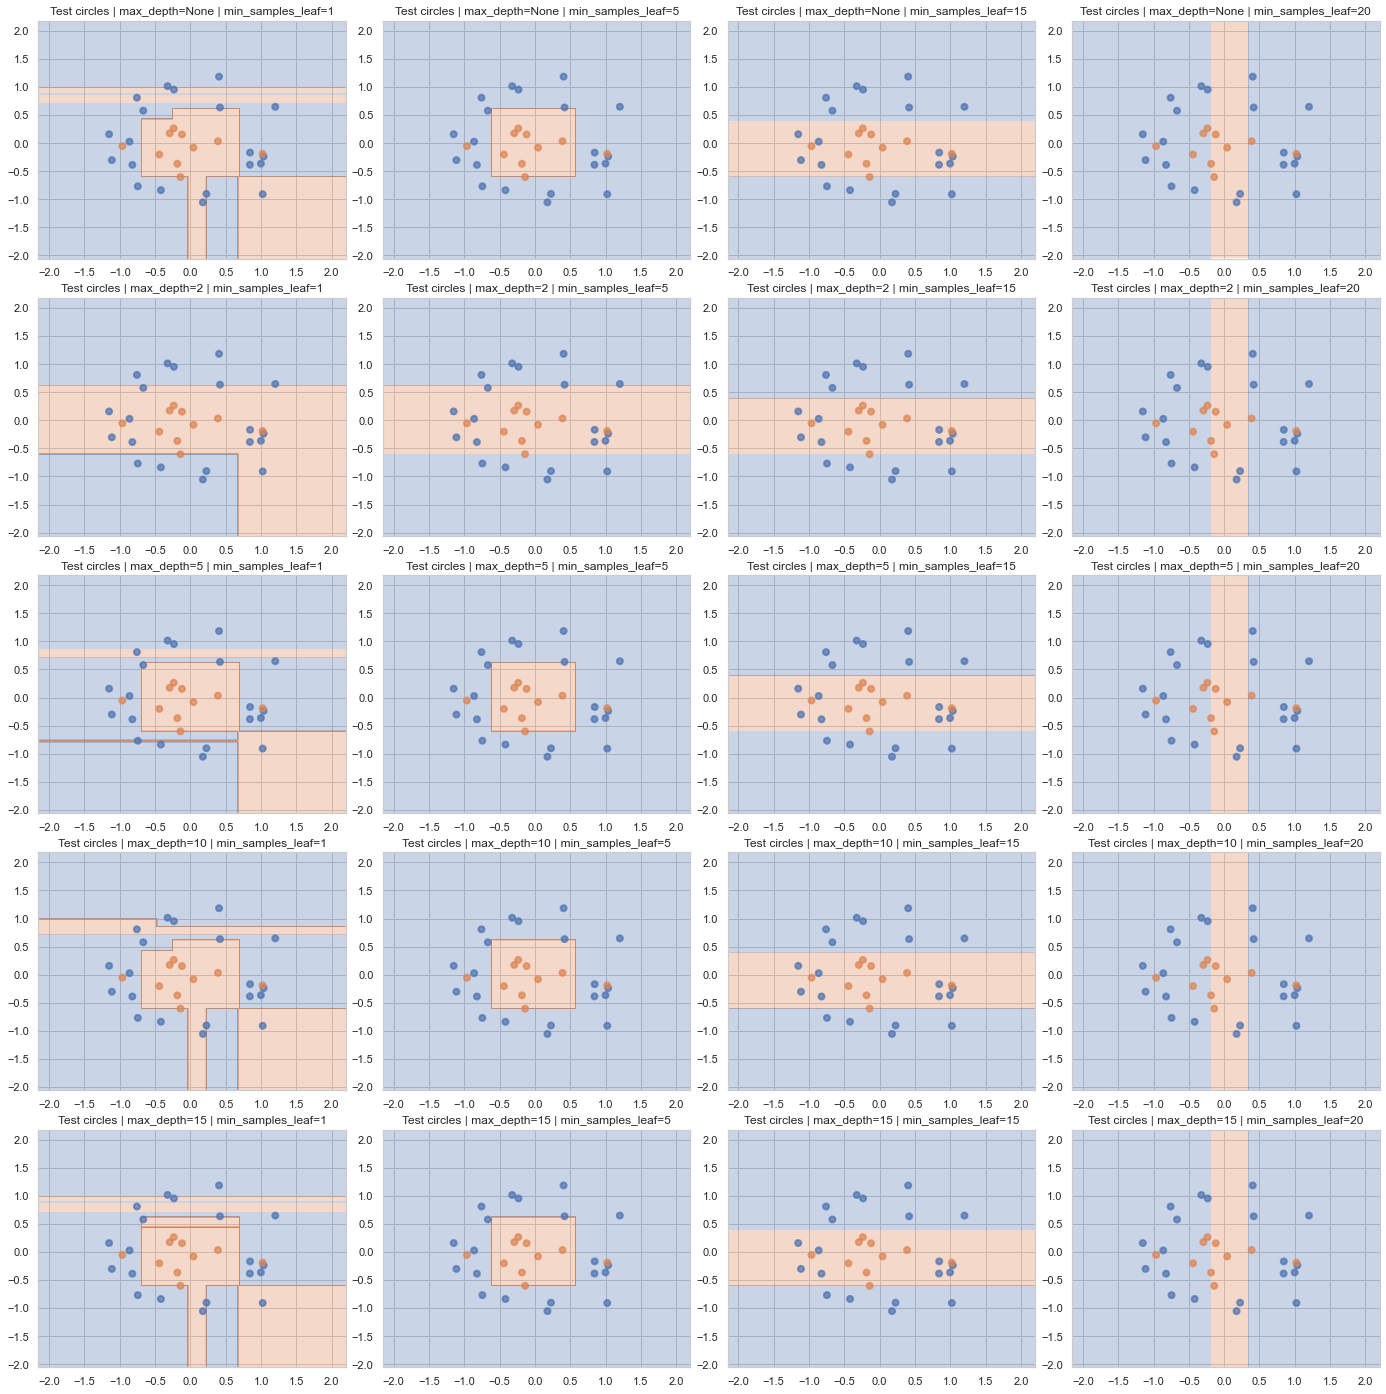

In [199]:
plt.figure(figsize=(20, 20))
for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_cir, y_train_cir)
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(model, X_test_cir, y_test_cir)
        plt.title('Test circles | ' + 'max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

In [200]:
print('\t Circles\n')

for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_cir, y_train_cir)
        
        print('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        
        print("Train accuracy = %.2f" % accuracy_score(y_train_cir, model.predict(X_train_cir)))
        print("Test accuracy  = %.2f" % accuracy_score(y_test_cir, model.predict(X_test_cir)))
        print("\n")

	 Circles

max_depth=None | min_samples_leaf=1
Train accuracy = 1.00
Test accuracy  = 0.77


max_depth=None | min_samples_leaf=5
Train accuracy = 0.87
Test accuracy  = 0.90


max_depth=None | min_samples_leaf=15
Train accuracy = 0.79
Test accuracy  = 0.70


max_depth=None | min_samples_leaf=20
Train accuracy = 0.69
Test accuracy  = 0.73


max_depth=2 | min_samples_leaf=1
Train accuracy = 0.83
Test accuracy  = 0.63


max_depth=2 | min_samples_leaf=5
Train accuracy = 0.81
Test accuracy  = 0.67


max_depth=2 | min_samples_leaf=15
Train accuracy = 0.79
Test accuracy  = 0.70


max_depth=2 | min_samples_leaf=20
Train accuracy = 0.69
Test accuracy  = 0.73


max_depth=5 | min_samples_leaf=1
Train accuracy = 0.97
Test accuracy  = 0.77


max_depth=5 | min_samples_leaf=5
Train accuracy = 0.87
Test accuracy  = 0.90


max_depth=5 | min_samples_leaf=15
Train accuracy = 0.79
Test accuracy  = 0.70


max_depth=5 | min_samples_leaf=20
Train accuracy = 0.69
Test accuracy  = 0.73


max_depth=10 | min_samp

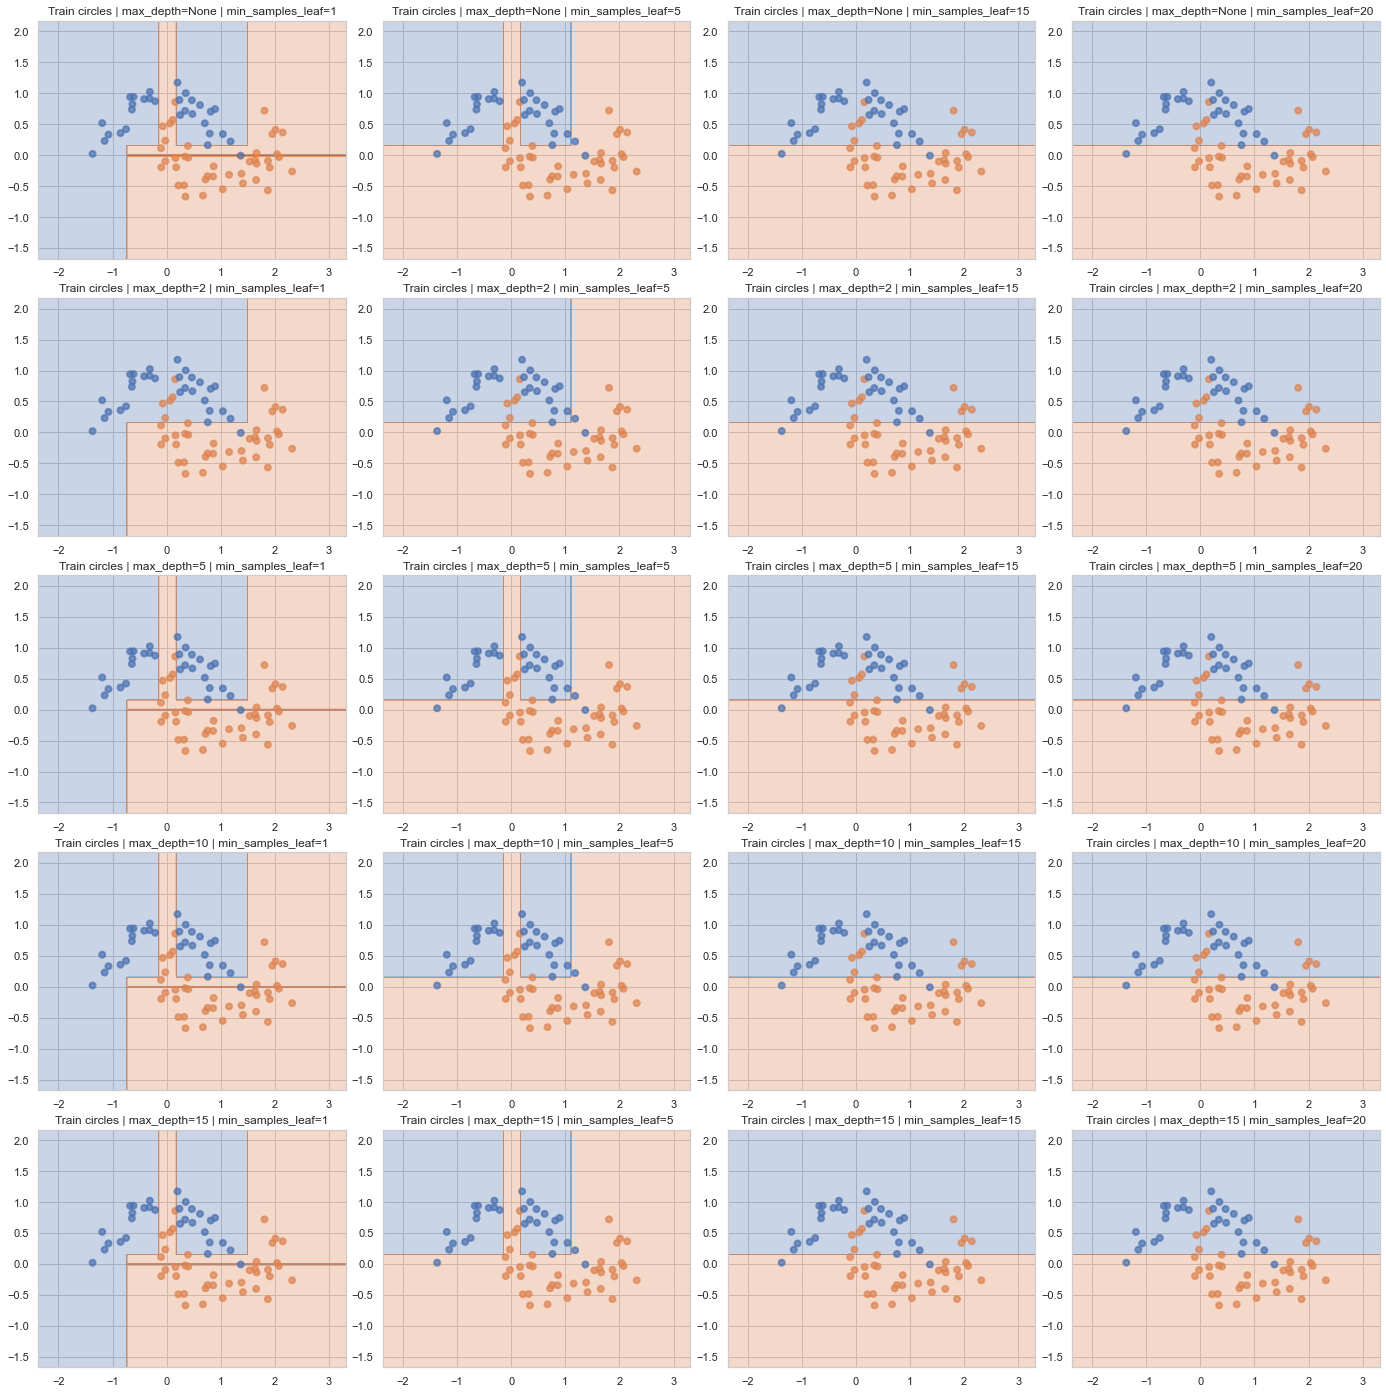

In [201]:
plt.figure(figsize=(20, 20))
for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_moon, y_train_moon)
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(model, X_train_moon, y_train_moon)
        plt.title('Train circles | ' + 'max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

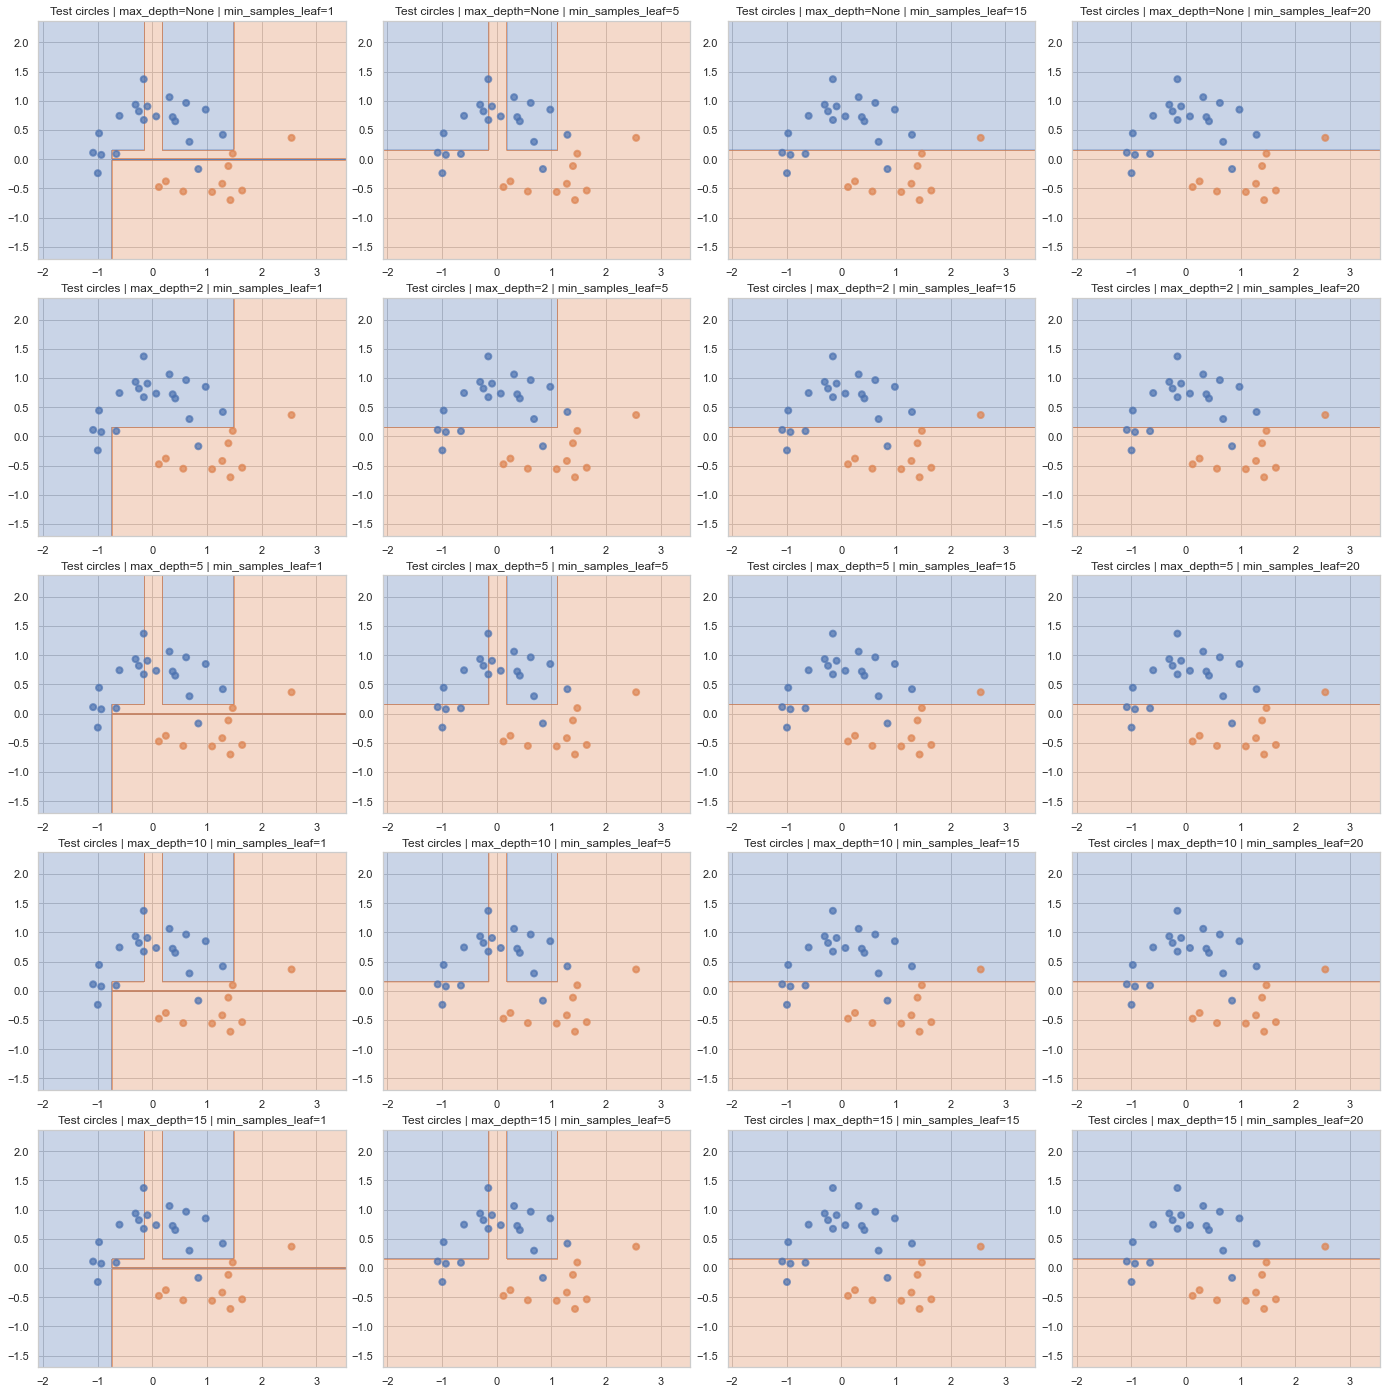

In [202]:
plt.figure(figsize=(20, 20))
for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_moon, y_train_moon)
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(model, X_test_moon, y_test_moon)
        plt.title('Test circles | ' + 'max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

In [203]:
print('\t Moons\n')

for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_moon, y_train_moon)
        
        print('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        
        print("Train accuracy = %.2f" % accuracy_score(y_train_moon, model.predict(X_train_moon)))
        print("Test accuracy  = %.2f" % accuracy_score(y_test_moon, model.predict(X_test_moon)))
        print("\n")

	 Moons

max_depth=None | min_samples_leaf=1
Train accuracy = 1.00
Test accuracy  = 0.87


max_depth=None | min_samples_leaf=5
Train accuracy = 0.96
Test accuracy  = 0.73


max_depth=None | min_samples_leaf=15
Train accuracy = 0.84
Test accuracy  = 0.80


max_depth=None | min_samples_leaf=20
Train accuracy = 0.84
Test accuracy  = 0.80


max_depth=2 | min_samples_leaf=1
Train accuracy = 0.91
Test accuracy  = 0.93


max_depth=2 | min_samples_leaf=5
Train accuracy = 0.89
Test accuracy  = 0.80


max_depth=2 | min_samples_leaf=15
Train accuracy = 0.84
Test accuracy  = 0.80


max_depth=2 | min_samples_leaf=20
Train accuracy = 0.84
Test accuracy  = 0.80


max_depth=5 | min_samples_leaf=1
Train accuracy = 1.00
Test accuracy  = 0.87


max_depth=5 | min_samples_leaf=5
Train accuracy = 0.96
Test accuracy  = 0.73


max_depth=5 | min_samples_leaf=15
Train accuracy = 0.84
Test accuracy  = 0.80


max_depth=5 | min_samples_leaf=20
Train accuracy = 0.84
Test accuracy  = 0.80


max_depth=10 | min_sample

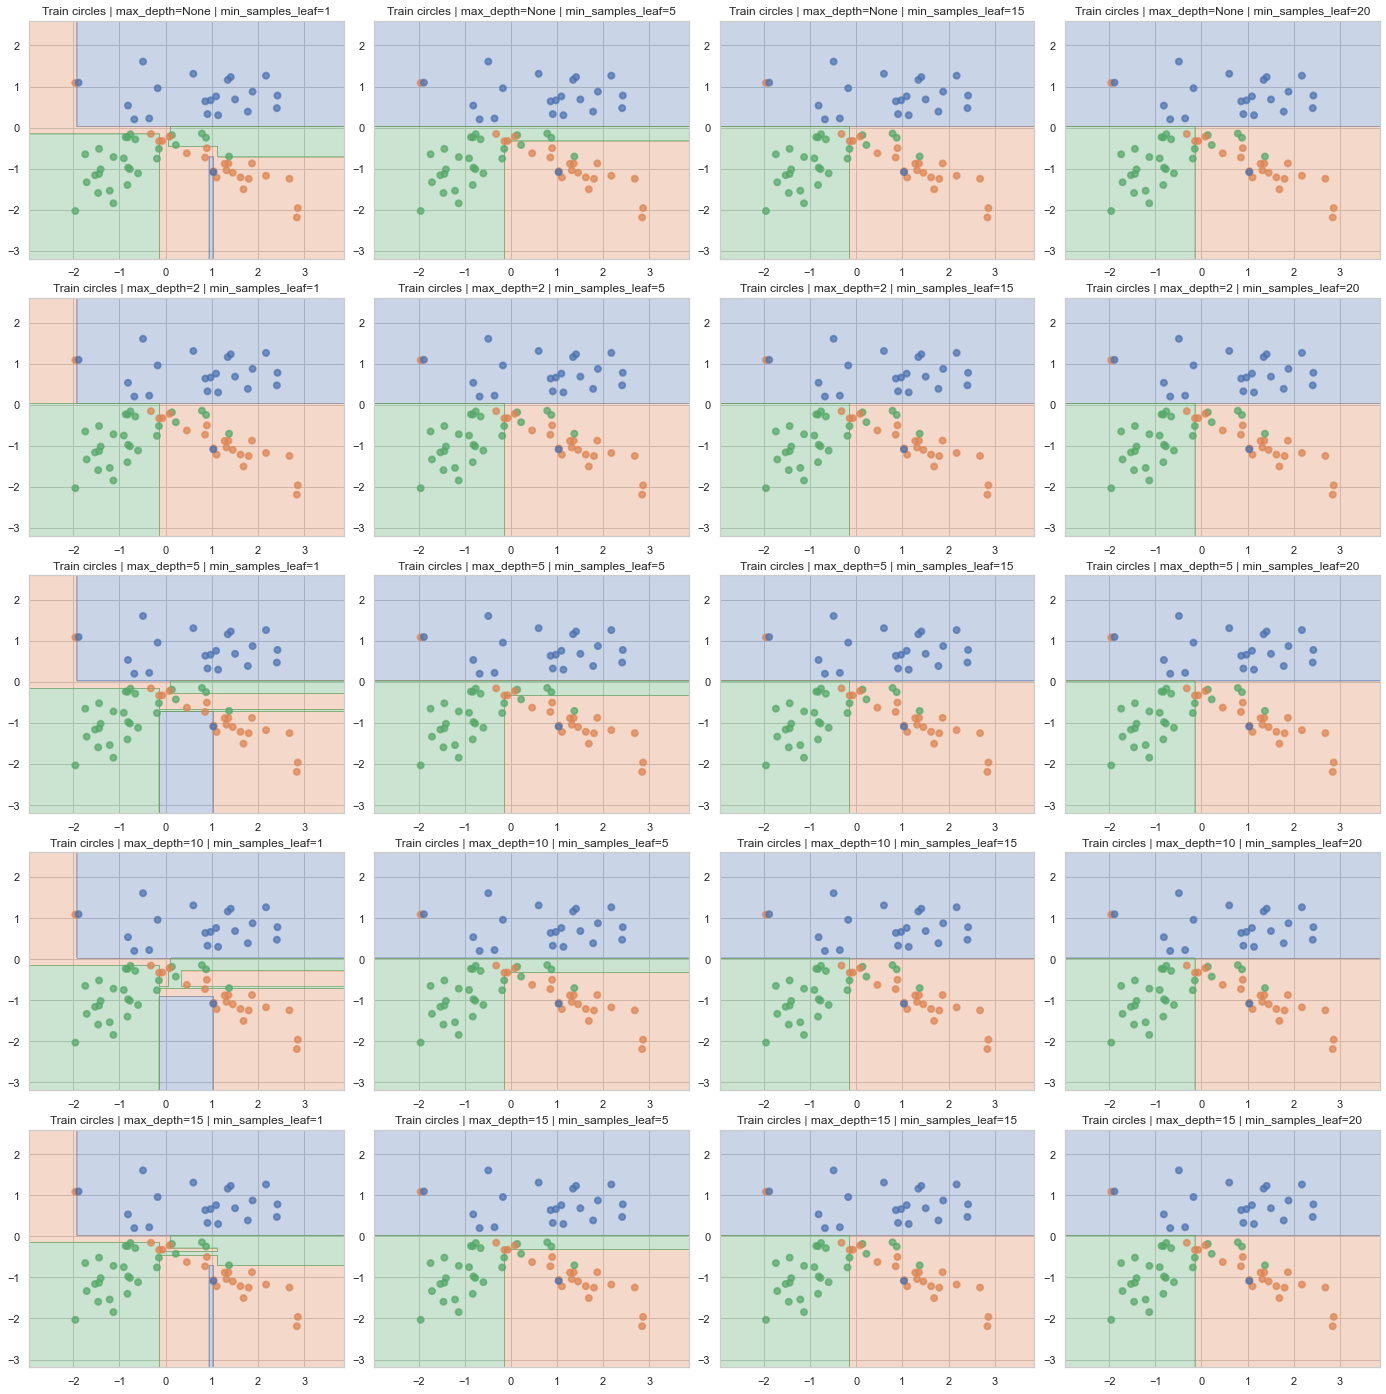

In [204]:
plt.figure(figsize=(20, 20))
for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_clasf, y_train_clasf)
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(model, X_train_clasf, y_train_clasf)
        plt.title('Train circles | ' + 'max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

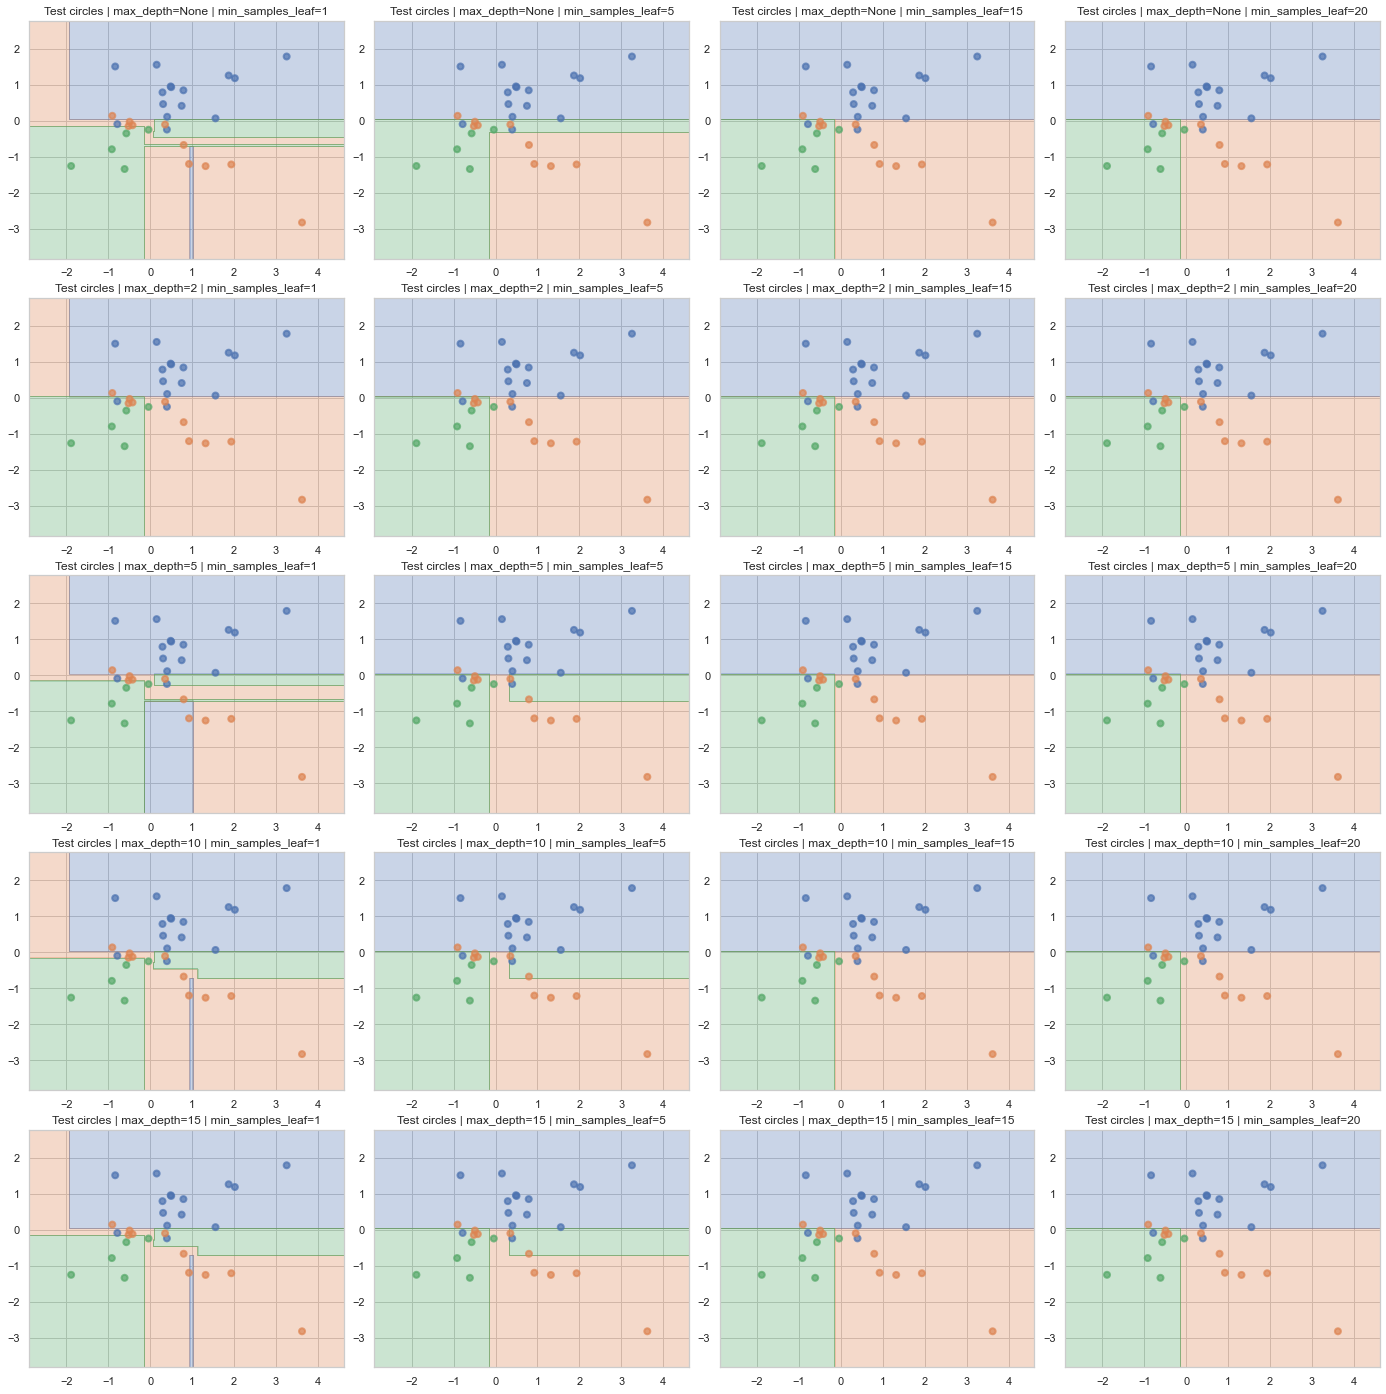

In [205]:
plt.figure(figsize=(20, 20))
for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_clasf, y_train_clasf)
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(model, X_test_clasf, y_test_clasf)
        plt.title('Test circles | ' + 'max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

In [206]:
print('\t Classification\n')

for i, max_depth in enumerate([None, 2, 5, 10, 15]):
    for j, min_samples_leaf in enumerate([1, 5, 15, 20]):
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(X_train_clasf, y_train_clasf)
        
        print('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        
        print("Train accuracy = %.2f" % accuracy_score(y_train_clasf, model.predict(X_train_clasf)))
        print("Test accuracy  = %.2f" % accuracy_score(y_test_clasf, model.predict(X_test_clasf)))
        print("\n")

	 Classification

max_depth=None | min_samples_leaf=1
Train accuracy = 1.00
Test accuracy  = 0.77


max_depth=None | min_samples_leaf=5
Train accuracy = 0.90
Test accuracy  = 0.77


max_depth=None | min_samples_leaf=15
Train accuracy = 0.89
Test accuracy  = 0.77


max_depth=None | min_samples_leaf=20
Train accuracy = 0.89
Test accuracy  = 0.77


max_depth=2 | min_samples_leaf=1
Train accuracy = 0.90
Test accuracy  = 0.77


max_depth=2 | min_samples_leaf=5
Train accuracy = 0.89
Test accuracy  = 0.77


max_depth=2 | min_samples_leaf=15
Train accuracy = 0.89
Test accuracy  = 0.77


max_depth=2 | min_samples_leaf=20
Train accuracy = 0.89
Test accuracy  = 0.77


max_depth=5 | min_samples_leaf=1
Train accuracy = 0.97
Test accuracy  = 0.77


max_depth=5 | min_samples_leaf=5
Train accuracy = 0.90
Test accuracy  = 0.77


max_depth=5 | min_samples_leaf=15
Train accuracy = 0.89
Test accuracy  = 0.77


max_depth=5 | min_samples_leaf=20
Train accuracy = 0.89
Test accuracy  = 0.77


max_depth=10 | m

__Ответ:__ Из увиденного можно сделать вывод об увеличении точности модели на тестовой выборке при увеличении допустимой грубины дерева и уменьшении минимального количества объектов в листе, что и логично, чем больше грубина - тем больше предикатов, чем меньше мин кол объектов в листе - тем больше листьев формируется. Для датасета Classification Test accuracy  = 0.77 (исключением является max_depth=15 | min_samples_leaf=1, при котором Test accuracy  = 0.80. Это в свою очереть max max_depth и min min_samples из рассматриваемых) при любых рассматриваемых значениях рассматриваемых параметров (видимо из-за того, что тестовая выборка мала или из-за того, что в обучающей выборке объекты одно класса нахотся достаточно близко друг-другу (имеют малый разброс))

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [163]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    fv_sort_uni = np.unique(feature_vector)
    thresholds = (fv_sort_uni[:-1] + fv_sort_uni[1:]) / 2

    len_r = np.cumsum(np.unique(feature_vector, return_counts=True)[1])[:-1]
    len_l = len(feature_vector) - len_r

    class_1 = np.sort(feature_vector[target_vector == 1])

    len_class_1_r = np.cumsum(1 * np.isin(fv_sort_uni, class_1))[:-1]
    len_class_1_l = np.full_like(len_class_1_r, np.sum(1 * np.isin(fv_sort_uni, class_1))) - len_class_1_r

    p1_r = len_class_1_r / len_r
    p1_l = len_class_1_l / len_l

    H_r = 2 * p1_r * (1 - p1_r)
    H_l = 2 * p1_l * (1 - p1_l)

    ginis = - len_r / len(feature_vector) * H_r - len_l / len(feature_vector) * H_l
    id_max = np.argmax(ginis)
    threshold_best = thresholds[id_max]
    gini_best = ginis[id_max]
    return thresholds, ginis, threshold_best, gini_best


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y != sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(1, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_count / current_click
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))
            else:
                raise ValueError

            if len(feature_vector) == 3:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "Categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[split], node["right_child"])

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


ID посылки: 77182899

username:   yammorozov@edu.hse.ru

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [164]:
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [168]:
data.shape

(258, 6)

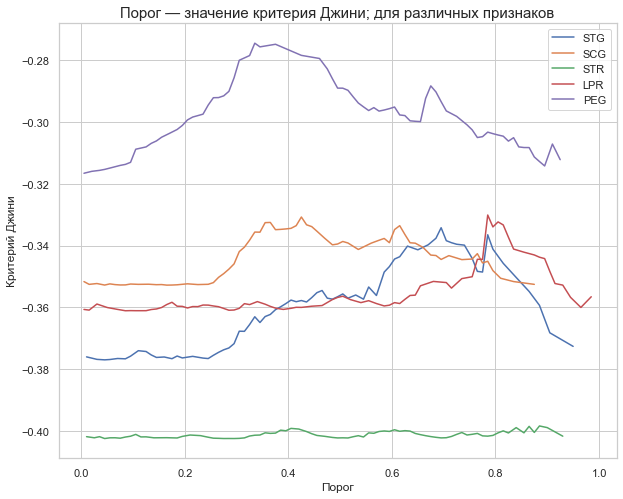

In [166]:
plt.figure(figsize=(10, 8))
for col in data.columns[:-1]:
    split = find_best_split(data[col], data['UNS'])
    plt.plot(split[0], split[1], label=col)
    
plt.xlabel('Порог')
plt.ylabel('Критерий Джини')
plt.title('Порог — значение критерия Джини; для различных признаков', fontsize = 15)
plt.legend()
plt.show()

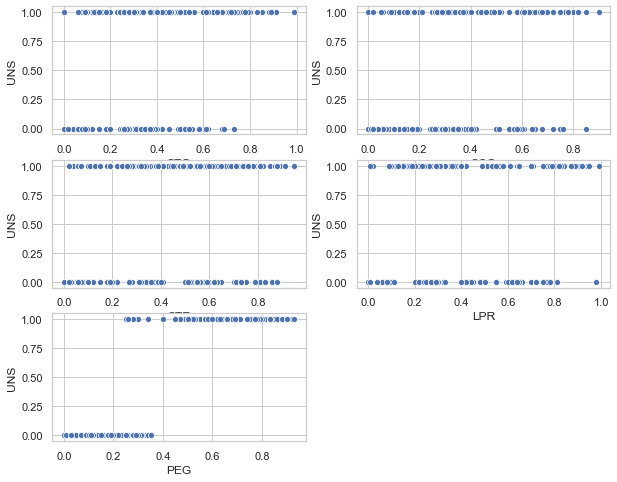

In [167]:
plt.figure(figsize=(10, 8))
for i in range(data.shape[1] - 1):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=data, x=data.columns[i], y='UNS')
    #plt.title(data.columns[i])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**  
* Лучшие значения критерия Джини достигаются при делении выборки по признаку PEG. 

* Так же данный результат согласуется с визуальным результатом scatter-графиком, так как при разделении по признаку PEG - лучшее и самое явное разбиение на классы в зависимости от его значений.
* "Хорошая" кривая признаков - наиболее выпуклая и которая при одном из порогов критерия Джини максимально близко приближается к нулю.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [209]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    fv_sort_uni = np.unique(feature_vector)
    thresholds = (fv_sort_uni[:-1] + fv_sort_uni[1:]) / 2

    len_r = np.cumsum(np.unique(feature_vector, return_counts=True)[1])[:-1]
    len_l = len(feature_vector) - len_r

    class_1 = np.sort(feature_vector[target_vector == 1])

    len_class_1_r = np.cumsum(1 * np.isin(fv_sort_uni, class_1))[:-1]
    len_class_1_l = np.full_like(len_class_1_r, np.sum(1 * np.isin(fv_sort_uni, class_1))) - len_class_1_r

    p1_r = len_class_1_r / len_r
    p1_l = len_class_1_l / len_l

    H_r = 2 * p1_r * (1 - p1_r)
    H_l = 2 * p1_l * (1 - p1_l)

    ginis = - len_r / len(feature_vector) * H_r - len_l / len(feature_vector) * H_l
    id_max = np.argmax(ginis)
    threshold_best = thresholds[id_max]
    gini_best = ginis[id_max]
    return thresholds, ginis, threshold_best, gini_best


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):  # != -> ==
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):  # range(1... -> range(0...
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count  #current_count/current_click -> current_click/current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) #x[1] -> x[0]
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))
            else:
                raise ValueError


            if len(np.unique(feature_vector)) <= 1: # len(feature_vector) == 3 -> len(np.unique(feature_vector)) <= 1
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":  # "Categorical" -> "categorical"
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]   # .most_common(1) -> .most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])
        #sub_y[split] -> sub_y[np.logical_not(split)]

    def _predict_node(self, x, node):   
        if node["type"] == "terminal": return node["class"]

        if self._feature_types[node["feature_split"]] == "categorical" and \
                x[node["feature_split"]] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
        if self._feature_types[node["feature_split"]] == "real" and\
                x[node["feature_split"]] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
        return self._predict_node(x, node["right_child"])
    

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [212]:
data2 = pd.read_csv('agaricus-lepiota.data', sep=',', header=None)
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [213]:
from sklearn.preprocessing import LabelEncoder

for col in data2.columns:
    data2[col] = LabelEncoder().fit_transform(data2[col])

y2 = data2[0]    
X2 = data2.drop(columns=0)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5)
#dt = DecisionTree(feature_types=['categorical'] * X2.shape[1])
dt  = DecisionTree(feature_types=['real'] * X2.shape[1])
dt.fit(X2_train, y2_train)

print("Train accuracy = %.4f" % accuracy_score(y2_train, dt.predict(X2_train)))
print("Test accuracy = %.4f"  % accuracy_score(y2_test,  dt.predict(X2_test)))

TypeError: '(slice(None, None, None), 0)' is an invalid key

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: